<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import regularizers

In [145]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [146]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [147]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [148]:
model = tf.keras.Sequential()
drop_out = 0.3
ler_rat = 0.0001
model.add(layers.Flatten(input_shape=(28, 28)))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(ler_rat)))
model.add(layers.Dropout(drop_out))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(ler_rat)))
model.add(layers.Dropout(drop_out))
# model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(ler_rat)))
# model.add(layers.Dropout(drop_out))
# model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(ler_rat)))
# model.add(layers.Dropout(drop_out))
# model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(ler_rat)))
# model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
# model.add(layers.Dropout(0.2))

# model.add(layers.Dense(216, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dense(512, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(500, activation='sigmoid', kernel_regularizer=regularizers.l2(0.000001)))
# model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
# # model.add(layers.Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
# model.add(layers.Dropout(0.5))
# # model.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Dense(10, activation='softmax'))
# model.add(layers.Softmax())

In [149]:
model.compile(#optimizer='adam',
              optimizer='adamax',
              # optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy'])

In [150]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/60
7/7 [==============================] - 6s 691ms/step - loss: 1.8185 - sparse_categorical_accuracy: 0.4323 - val_loss: 1.0098 - val_sparse_categorical_accuracy: 0.7044
Epoch 2/60
7/7 [==============================] - 4s 561ms/step - loss: 1.0324 - sparse_categorical_accuracy: 0.6771 - val_loss: 0.7972 - val_sparse_categorical_accuracy: 0.7532
Epoch 3/60
7/7 [==============================] - 4s 507ms/step - loss: 0.8698 - sparse_categorical_accuracy: 0.7296 - val_loss: 0.7225 - val_sparse_categorical_accuracy: 0.7816
Epoch 4/60
7/7 [==============================] - 5s 782ms/step - loss: 0.7828 - sparse_categorical_accuracy: 0.7624 - val_loss: 0.6745 - val_sparse_categorical_accuracy: 0.7996
Epoch 5/60
7/7 [==============================] - 4s 506ms/step - loss: 0.7292 - sparse_categorical_accuracy: 0.7829 - val_loss: 0.6438 - val_sparse_categorical_accuracy: 0.8152
Epoch 6/60
7/7 [==============================] - 4s 512ms/step - loss: 0.6892 - sparse_categorical_accuracy: 

In [151]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']


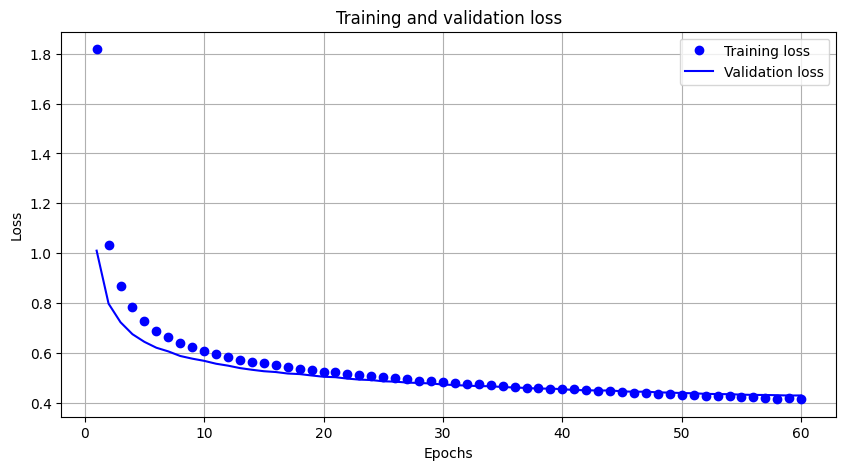

<Figure size 640x480 with 0 Axes>

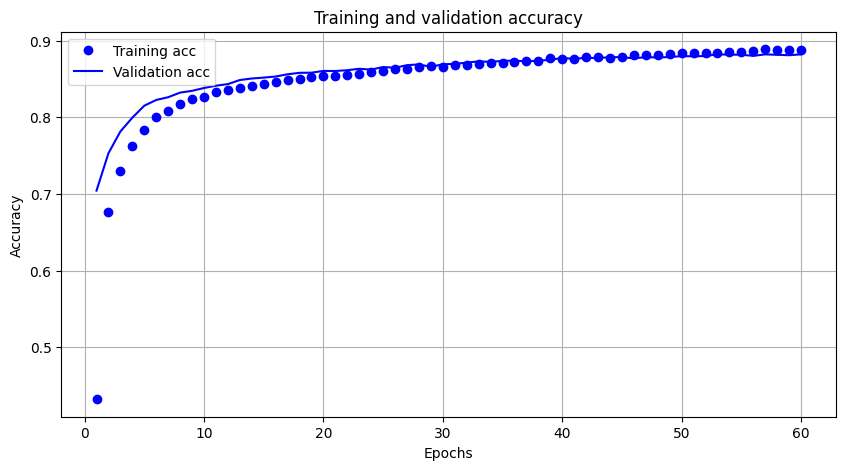

In [152]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['sparse_categorical_accuracy']
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [153]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [154]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [155]:
predictions[0]

array([0.08596928, 0.08596212, 0.08597431, 0.08595996, 0.08596916,
       0.08699954, 0.08598119, 0.08929721, 0.08601489, 0.22187226],
      dtype=float32)

In [156]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_60 (Dense)            (None, 512)               401920    
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                                 
 dense_61 (Dense)            (None, 512)               262656    
                                                                 
 dropout_41 (Dropout)        (None, 512)               0         
                                                                 
 dense_62 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 6697